**AVIATION ACCIDENTS**


**INTRODUCTION**

The company wants to diversify its portfolio and its interested in purchasing and operating airplanes for commercial and private enterprises. We are going to use the data from National Transportation Safety Board to give us insights on the aviation industry, the risks involved and how to mitigate them.

**OBJECTIVE STATEMENT**

We are going to load the data;AviationData.csv, clean it and draw insights from it. We will have an understanding of the aviation industry operations and get to know some of the risk factors that contribute to the accidents in the industry.Then we will draw recommendations from the data that will help the company to thrive in the industry.


**DATA UNDERSTANDING**

In this project we are going to use data from the National Transportation Safety Board, AviationData.csv. The data has been collected from 1962 to 2023.The data includes aviation accidents data in the United States and international waters.

**BUSINESS UNDERSTANDING**

From the data,we are supposed to derive how best we can get into the business and thrive in it. To do this we need to understand the risk factors involved and how best to mitigate them to avoid making losses.
We are going to answer the three questions below  to open our minds on the real challenges affecting the aviation industry and hence drive our decision making.
1. Identify plane engines with least number of accidents.
2. Identify which weather condition contribute to most accidents.
3. Identify most risky locations where accidents are more severe.


**REQUIREMENTS**
1. Load the dataset
2. Identify and deal with missing  values
3. Aggregate our data and do visualizations

**1.Importing libraries**

We are going to import libraries that are going to help us with data exploration and visualization. We will use pandas,matplotlib and numpy.



In [72]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**2.Loading our csv file**

We are going to load our csv file to a pandas DataFrame and name it df. We are also going to get more information on our dataset by using .info() and .shape to check the number if rows and columns in our dataset

In [73]:
#Loading our dataset
df = pd.read_csv(r'AviationData.csv',encoding='latin-1',low_memory=False)
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [74]:
#Using .info() to understand the nature of our dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

From the .info we are able to see our columns and we can also note the columns with missing values.The dataset has several colums some of which are not relevant to our our project. We are going to create another dataframe with the columns that are more relevant to what we ainterested in.

In [75]:
# Using .shape to know get the number of columns and rows our dataset has
df.shape

(88889, 31)

**2.DATA CLEANING**

This will include data preparation, dealing with missing values, dropping columns that are not soo relevant to what we are looking for.

In [76]:
#Dropping columns with limited predictive value
#We will create another dataframe that will not have the dropped columns. This will prevent us from tampering with the original dataset
df_2 = df.drop(['Latitude','Longitude','FAR.Description','Air.carrier', 'Schedule','Aircraft.Category','Airport.Code','Airport.Name','Publication.Date'],axis=1)


In the codecell above we have dropped some collumns that have limited value to what we are trying to achieve. In the codecell bellow we have added some columns that are going to help us in our next step of data analysis and visualizations

In [77]:
#Adding a column that combines make and model to make one airplane identifier
df_2['Aircraft_type'] = df_2['Make'] + df_2['Model']

#Adding a column that shows a total of taotal passangers on board
df_2['Total_aboard'] = df_2['Total.Fatal.Injuries']+df_2['Total.Serious.Injuries']+df_2['Total.Minor.Injuries']+df_2['Total.Uninjured']

#Adding a column to show how many were injured
df_2['Total_injuired'] = df_2['Total.Fatal.Injuries']+df_2['Total.Serious.Injuries']+df_2['Total.Minor.Injuries']

#Calculating the fatality rate 
df_2['Injury_rate'] = df_2['Total_injuired']/df_2['Total_aboard']


In [78]:
#Cheking our new dataframe after dropping and adding columns 
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Injury.Severity         87889 non-null  object 
 7   Aircraft.damage         85695 non-null  object 
 8   Registration.Number     87572 non-null  object 
 9   Make                    88826 non-null  object 
 10  Model                   88797 non-null  object 
 11  Amateur.Built           88787 non-null  object 
 12  Number.of.Engines       82805 non-null  float64
 13  Engine.Type             81812 non-null  object 
 14  Purpose.of.flight       82697 non-null

**Dealing with missing values**

Our dataframe has several columns with missing values, we are going to deal with each column to ensure we dont get some trouble when working with our data. We will work on missing values in our relevant columns which include ,Total_injuired,Injury_rate,Total_aboard,Aircraft_type,Number.of.Engines,Engine.Type,Location.

In [66]:
#Dealing with missing values in numerical columns.They include;Total_injuired,Injury_rate,Total_aboard,Number.of.Engines
columns = ['Total_injuired','Injury_rate','Total_aboard','Number.of.Engines']
df_2[columns] = df_2[columns].apply(lambda x: x.fillna(x.mean()))

#Dealing with missing values in categorical columns.They include;Engine.Type,Aircraft_type & Location
cols =['Engine.Type','Aircraft_type','Location','Broad.phase.of.flight']
df_2[cols] = df_2[cols].apply(lambda col: col.fillna(col.mode()[0]))

#Type of engine column cleaning
df_2['Engine.Type'] = df_2['Engine.Type'].replace('NONE','None')

#Weather condition column cleaning
df_2['Weather.Condition'] = df_2['Weather.Condition'].replace('Unk','UNK')

df_2

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Aircraft_type,Total_aboard,Total_injuired,Injury_rate
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,0.0,0.0,0.0,UNK,Cruise,Probable Cause,Stinson108-3,2.00000,2.000000,1.000000
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,0.0,0.0,0.0,UNK,Unknown,Probable Cause,PiperPA24-180,4.00000,4.000000,1.000000
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,NaN,NaN,NaN,IMC,Cruise,Probable Cause,Cessna172M,5.84248,1.060452,0.419945
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,0.0,0.0,0.0,IMC,Cruise,Probable Cause,Rockwell112,2.00000,2.000000,1.000000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,2.0,NaN,0.0,VMC,Approach,Probable Cause,Cessna501,5.84248,1.060452,0.419945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,N1867H,PIPER,...,1.0,0.0,0.0,NaN,Landing,NaN,PIPERPA-28-151,1.00000,1.000000,1.000000
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,N2895Z,BELLANCA,...,0.0,0.0,0.0,NaN,Landing,NaN,BELLANCA7ECA,0.00000,0.000000,0.419945
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,N749PJ,AMERICAN CHAMPION AIRCRAFT,...,0.0,0.0,1.0,VMC,Landing,NaN,AMERICAN CHAMPION AIRCRAFT8GCBC,1.00000,0.000000,0.000000
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,N210CU,CESSNA,...,0.0,0.0,0.0,NaN,Landing,NaN,CESSNA210N,0.00000,0.000000,0.419945


In [67]:
#Checking the number of missing values 
df_2.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                     226
Injury.Severity            1000
Aircraft.damage            3194
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight         0
Report.Status              6381
Aircraft_type                 0
Total_aboard                  0
Total_injuired                0
Injury_rate                   0
dtype: int64

Now we have cleaned out the relevant columns  in our dataset. We have worked on all our missing values. We could not have dropped all the missing values. they would have made a great impact on our dataset since they are many. We have replaced the mising values in numerical columns with the mean, and the object colomns we have kept the missing values but replaced them with mode. We have worked on the missing values in columns that are consequential to our task.

**QUESTION 1**

**Which engine is the safest?**

To answer this question we are going to find the airplane engine type with the least injury rate. We will filter engine types and plot them in a bar graph to see clearely their injury rate. 



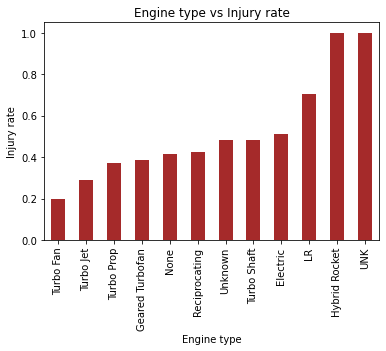

In [68]:

#Airplaine type with least injury rate
Grouped = df_2.groupby('Engine.Type')['Injury_rate'].mean().sort_values(ascending=True)

#Plotting our data
Grouped.plot(kind='bar',title='Engine type vs Injury rate',xlabel='Engine type',ylabel='Injury rate',color = 'brown')
plt.savefig('Images/engine_type.png');




From the bar graph above, we can see the engine types with the the least injury rates as well as the ones with the most injury rate

**QUESTION 2**

** Identify which weather condition contribute to most accidents.**

For over the years weather has been known to be one of the major factors that course arcraft accidents. We will use our dataset to understand which weather condition is the riskiest for air travel. We will use a bar chart to visualize this.



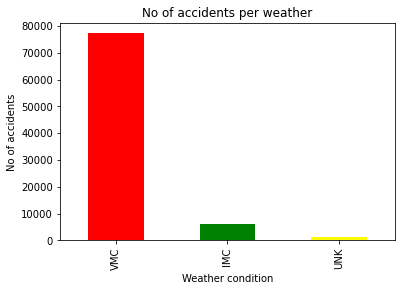

In [69]:
#Weather counts
weather_cond = df_2['Weather.Condition'].value_counts()

#Creating a bargraph
weather_cond.plot(kind = 'bar',title = 'No of accidents per weather',xlabel= 'Weather condition',ylabel= 'No of accidents',color =['red','green','yellow'])
plt.savefig('Images/weather_conditions.png');

**QUESTION 3**

**Identify most risky locations where accidents are most severe**

We will plot location against the injury rate to see the locations where accidents are most severe

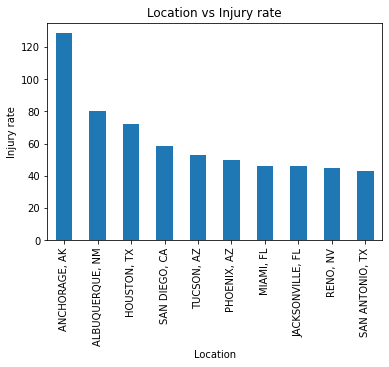

In [70]:
#Group our data by location
Grouped_2 = df_2.groupby('Location')['Injury_rate'].sum().sort_values(ascending=False)

#Plot a bar graph, for 10 locations with highest injury rate
Grouped_2.head(10).plot(kind='bar',title='Location vs Injury rate',xlabel='Location',ylabel='Injury rate')
plt.savefig('Images/location.png');



**Trends over years**

We are going to see how the trends have been over the years using a line graph. 

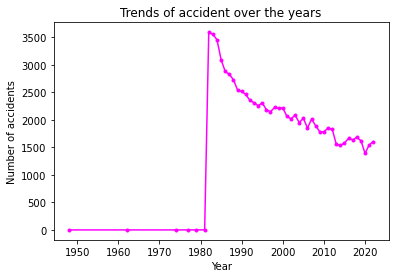

In [71]:
#Convert the date column to datetime format
df_2['Event.Date'] = pd.to_datetime(df_2['Event.Date'])

#We will extract the year from our Event.Date column
df_2['year'] = df_2['Event.Date'].dt.year

#We then calculate number of accidents per year
Acc_per_year = df_2['year'].value_counts().sort_index()

#We visualize in a lineplot
Acc_per_year.plot(kind = 'line',color = 'magenta',marker = '.',xlabel='Year',ylabel='Number of accidents',title='Trends of accident over the years')
plt.savefig('Images/trends_over_years.png');


**SUMMARY**

We have been able to discover several things in aviation industry thanks to our data and our visualizations that have painted out a clear picture. 

Aviation industry is noticeably lucrative, mostly because it serves many purposes. However its an industry with risks and from our lineplot on the trends of accidents over time, the accidents are still rampant, though decreasing in number as from 1980. To thrive in the business, we will have to ensure our accident rate is as low as possible.Every accident is a loss, and as a start up, we cannot bear to incur losses. Accidents can also dent our reputation so ensureing safe flights should be ur priority.

 There are soo many risks in the business, we have only highlighted three, and have come up with the following recommendations;

 1. All engine types have recorded accidents but the Turbo Fan engine has the least number of injury rates. Its a safer engine as compared to the rest.If we purchase arcrafts with this kind of engines then we are assured of safer flights.

2. We have to be on the lookout on weather.From our data we got a very interesting find,contrary to what we know that bad weather causes most accidents, our data states differently.The VMC - Visual Metrological Condition,which involves clear skies no heavy rains and clear visibility, has the highest number of accidents. This shows that mostly, its not really about the weather, its about the pilot, the engine type, the plane model and make etc. Also soo many planes are in the air during this time. Setting up proper control departments to monitor the routes would help mitigate this risk. Also competent pilots

3. There are geographical locations that have very high injury rate. When a plane crushes there the results are more fatal. From the bar chart top 10 locations are sighted, top of them being,Ankorage Ak. Avoiding such routes would put us n lower risk.